In [1]:
#manipulation des données
import numpy as np
import pandas as pd 

# sklearn preprocessing pour le traiter les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes 
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None) #permet d'afficher toutes les colonnes

In [2]:
df_cluster = pd.read_csv('../Data/3.K_means_clusters.csv')
df_cluster

,customer_unique_id,Recency,Frequency,Monetary,Cluster
0,7c396fd4830fd04220f754e42b4e5bff,27.289810,2,1.303348,3
1,af07308b275d755c9edb36a90c618231,14.162002,1,1.601216,0
2,3a653a41f6f9fc3d2a113cf8398680e8,13.051752,1,1.647432,0
3,7c142cf63193a1473d2e66489a9ae977,25.737451,1,1.457031,1
4,72632f0f9dd73dfee390c9b22eb56dd6,22.505471,1,1.220373,0
...,...,...,...,...,...
96091,6359f309b166b0196dbf7ad2ac62bb5a,33.093157,1,1.494089,1
96092,da62f9e57a76d978d02ab5362c509660,22.786720,1,1.663569,0
96093,737520a9aad80b3fbbdad19b66b37b30,28.407875,1,1.723809,1
96094,5097a5312c8b157bb7be58ae360ef43c,23.908753,1,1.686544,1


In [3]:
df = pd.read_csv('../Data/1.olist_dataset.csv')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,-19.810119,-43.984727,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,no title,no message,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,-21.362358,-48.232976,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-

In [4]:
df.drop_duplicates(subset=['order_id'], inplace=True)
df['total_amount'] = df['price'] + df['freight_value']
df['total_shipping'] = df.groupby('customer_unique_id')['total_amount'].transform('sum')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english,total_amount,total_shipping
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares,38.71,82.82
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,-19.810119,-43.984727,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,perfumery,141.46,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,no title,no message,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,-21.362358,-48.232976,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,auto,179.12,179.12
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,no title,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,-19.840168,-43.923299,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.767733,-35.275467,pet_shop,72.20,72.20
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5.0,no title,no message,2018-02-17 00:00:00,2018-02-18 13:02:51,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,-23.551707,-46.260979,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.675037,-46.524784,stationery,28.62,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119

In [5]:
df.drop_duplicates(subset=['customer_unique_id'], inplace=True)
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english,total_amount,total_shipping
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares,38.71,82.82
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,-19.810119,-43.984727,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,perfumery,141.46,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,no title,no message,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,-21.362358,-48.232976,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,auto,179.12,179.12
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,no title,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,-19.840168,-43.923299,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.767733,-35.275467,pet_shop,72.20,72.20
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5.0,no title,no message,2018-02-17 00:00:00,2018-02-18 13:02:51,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,-23.551707,-46.260979,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.675037,-46.524784,stationery,28.62,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119

In [6]:
df_RFM = pd.read_csv('../Data/2.RFM_dataset.csv')
df_RFM = df_RFM.drop(columns=['Monetary'])
df_RFM

,customer_unique_id,Recency,Frequency
0,7c396fd4830fd04220f754e42b4e5bff,27.289810,2
1,af07308b275d755c9edb36a90c618231,14.162002,1
2,3a653a41f6f9fc3d2a113cf8398680e8,13.051752,1
3,7c142cf63193a1473d2e66489a9ae977,25.737451,1
4,72632f0f9dd73dfee390c9b22eb56dd6,22.505471,1
...,...,...,...
96091,6359f309b166b0196dbf7ad2ac62bb5a,33.093157,1
96092,da62f9e57a76d978d02ab5362c509660,22.786720,1
96093,737520a9aad80b3fbbdad19b66b37b30,28.407875,1
96094,5097a5312c8b157bb7be58ae360ef43c,23.908753,1


In [7]:
df = pd.merge(df, df_RFM, on='customer_unique_id', how='left')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english,total_amount,total_shipping,Recency,Frequency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares,38.71,82.82,27.289810,2
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,-19.810119,-43.984727,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,perfumery,141.46,141.46,14.162002,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,no title,no message,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,-21.362358,-48.232976,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,auto,179.12,179.12,13.051752,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,no title,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,-19.840168,-43.923299,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.767733,-35.275467,pet_shop,72.20,72.20,25.737451,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5.0,no title,no message,2018-02-17 00:00:00,2018-02-18 13:02:51,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,-23.551707,-46.260979,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.675037,-46.524784,stationery,28.62,28.62,22.505471,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [8]:
df = pd.merge(df, df_cluster, on='customer_unique_id', how='left')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english,total_amount,total_shipping,Recency_x,Frequency_x,Recency_y,Frequency_y,Monetary,Cluster
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares,38.71,82.82,27.289810,2,27.289810,2,1.303348,3
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,-19.810119,-43.984727,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,perfumery,141.46,141.46,14.162002,1,14.162002,1,1.601216,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,no title,no message,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,-21.362358,-48.232976,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,auto,179.12,179.12,13.051752,1,13.051752,1,1.647432,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,no title,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,-19.840168,-43.923299,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.767733,-35.275467,pet_shop,72.20,72.20,25.737451,1,25.737451,1,1.457031,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5.0,no title,no message,2018-02-17 00:00:00,2018-02-18 13:02:51,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,-23.551707,-46.260979,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.675037,-46.524784,stationer

In [9]:
df['Cluster'] = df['Cluster'].astype(int)
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english,total_amount,total_shipping,Recency_x,Frequency_x,Recency_y,Frequency_y,Monetary,Cluster
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares,38.71,82.82,27.289810,2,27.289810,2,1.303348,3
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,-19.810119,-43.984727,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,perfumery,141.46,141.46,14.162002,1,14.162002,1,1.601216,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,no title,no message,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,-21.362358,-48.232976,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,auto,179.12,179.12,13.051752,1,13.051752,1,1.647432,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,no title,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,-19.840168,-43.923299,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.767733,-35.275467,pet_shop,72.20,72.20,25.737451,1,25.737451,1,1.457031,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5.0,no title,no message,2018-02-17 00:00:00,2018-02-18 13:02:51,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,-23.551707,-46.260979,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.675037,-46.524784,stationer

In [10]:
cluster_dataset = '../Data/4.KMeans_dataset.csv'
df.to_csv(cluster_dataset, index=False)

Cluster 0 est le cluster des clients récurrent

In [10]:
df[df['Cluster'] == 0].describe()

,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,geolocation_lat_x,geolocation_lng_x,customer_zip_code_prefix,geolocation_lat_y,geolocation_lng_y,total_amount,total_shipping,Recency_x,Frequency_x,Recency_y,Frequency_y,Monetary,Cluster
count,43768.000000,43768.000000,43768.000000,43768.0,43768.000000,43768.000000,43768.000000,43768.000000,43768.000000,43768.000000,43768.000000,43768.000000,43768.000000,43768.000000,43768.000000,43768.000000,43768.000000,43768.000000,43768.000000,43768.000000,43768.000000,43768.000000,43768.0,43768.000000,43768.0,43768.000000,43768.0
mean,1.018392,2.778445,160.363908,1.0,127.705996,21.036432,48.663156,819.230968,2.224433,1993.704784,29.168228,16.067104,22.291492,24385.471326,-22.718359,-47.175612,34052.596486,-21.275216,-46.187803,148.742428,148.742428,18.058651,1.0,18.058651,1.0,1.519847,0.0
std,0.192640,2.576552,218.097722,0.0,193.996377,17.691110,10.842476,660.489872,1.760362,3579.607111,15.729255,12.853203,11.218260,27771.923130,3.082463,2.400776,29689.637950,5.474613,3.965401,202.060987,202.060987,3.280852,0.0,3.280852,0.0,0.168387,0.0
min,1.000000,0.000000,0.010000,1.0,0.850000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2.000000,7.000000,1001.000000,-36.605374,-64.283946,1003.000000,-36.605374,-72.666706,9.590000,9.590000,11.284409,1.0,11.284409,1.0,0.858624,0.0
25%,1.000000,1.000000,60.790000,1.0,42.085000,13.050000,43.000000,366.000000,1.000000,263.000000,18.000000,8.000000,15.000000,6060.000000,-23.612024,-48.507287,9720.000000,-23.592150,-47.988846,57.860000,57.860000,15.308536,1.0,15.308536,1.0,1.404910,0.0
50%,1.000000,1.000000,106.085000,1.0,79.900000,17.600000,52.000000,635.000000,1.000000,600.000000,23.000000,13.000000,19.000000,13465.000000,-23.431481,-46.728476,23017.000000,-22.943831,-46.637529,98.290000,98.290000,18.617428,1.0,18.617428,1.0,1.525631,0.0
75%,1.000000,4.000000,177.115000,1.0,139.980000,22.830000,57.000000,1031.000000,3.000000,1750.000000,36.000000,20.000000,29.000000,25963.000000,-22.077090,-46.518082,56326.250000,-20.271332,-43.887996,165.040000,165.040000,20.940861,1.0,20.940861,1.0,1.631635,0.0
max,10.000000,24.000000,7274.880000,1.0,6729.000000,409.680000,76.000000,3988.000000,20.000000,40425.000000,105.000000,105.000000,105.000000,99730.000000,-2.546079,-34.847856,99980.000000,42.184003,-8.723762,6922.210000,6922.210000,23.063749,1.0,23.063749,1.0,2.179585,0.0


cluster 1 est le cluster des clients qui ont commandé qu'une fois mais récemment 

In [11]:
df[df['Cluster'] == 1].describe()

,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,geolocation_lat_x,geolocation_lng_x,customer_zip_code_prefix,geolocation_lat_y,geolocation_lng_y,total_amount,total_shipping,Recency_x,Frequency_x,Recency_y,Frequency_y,Monetary,Cluster
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.0
mean,1.030623,3.297720,145.553654,0.996938,108.386176,18.942848,48.390269,731.079279,2.044913,1962.982307,30.203130,15.600885,23.364750,24514.459000,-22.766918,-47.269135,33815.004764,-21.547155,-46.274483,127.329023,265.052565,22.563111,2.118408,22.563111,2.118408,1.496873,1.0
std,0.255134,2.981363,175.489608,0.055262,139.132970,12.658936,11.581530,641.373553,1.616802,3549.245563,16.455064,12.834534,12.211058,27564.038363,2.797618,3.227896,29771.220384,5.161134,3.925117,144.608765,276.189924,5.750796,0.521425,5.750796,0.521425,0.180127,0.0
min,1.000000,1.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.067159,-61.957201,1005.000000,-36.605374,-67.843457,0.000000,0.000000,7.319197,2.000000,7.319197,2.000000,0.000000,1.0
25%,1.000000,1.000000,60.035000,1.000000,39.900000,12.825000,42.000000,314.000000,1.000000,250.000000,18.000000,8.000000,15.000000,7118.000000,-23.623582,-48.831547,9738.000000,-23.583262,-47.949461,54.950000,131.240000,18.281994,2.000000,18.281994,2.000000,1.392390,1.0
50%,1.000000,2.000000,99.450000,1.000000,72.000000,16.110000,52.000000,555.000000,1.000000,650.000000,25.000000,12.000000,20.000000,13920.000000,-23.410007,-46.768284,22775.000000,-22.947654,-46.623571,89.750000,197.550000,22.626535,2.000000,22.626535,2.000000,1.505878,1.0
75%,1.000000,5.000000,170.625000,1.000000,129.895000,19.975000,57.000000,919.000000,3.000000,1700.000000,38.000000,20.000000,30.000000,25645.000000,-21.766477,-46.518082,52035.500000,-20.522089,-43.752404,150.405000,313.290000,26.936502,2.000000,26.936502,2.000000,1.613421,1.0
max,7.000000,21.000000,3184.340000,1.000000,2600.000000,155.390000,64.000000,3939.000000,15.000000,30000.000000,105.000000,105.000000,118.000000,99500.000000,0.000000,0.000000,99750.000000,2.803299,-34.826655,2626.070000,7571.630000,36.665915,17.000000,36.665915,17.000000,2.063518,1.0


cluster 2 est le cluster des clients qui ont commandé qu'une fois il y a longtemps

In [12]:
df[df['Cluster'] == 2].describe()

,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,geolocation_lat_x,geolocation_lng_x,customer_zip_code_prefix,geolocation_lat_y,geolocation_lng_y,total_amount,total_shipping,Recency_x,Frequency_x,Recency_y,Frequency_y,Monetary,Cluster
count,48225.000000,48225.000000,48225.000000,48225.000000,48225.000000,48225.000000,48225.000000,48225.000000,48225.000000,48225.000000,48225.000000,48225.000000,48225.000000,48225.00000,48225.000000,48225.000000,48225.000000,48225.000000,48225.000000,48225.000000,48225.000000,48225.000000,48225.0,48225.000000,48225.0,48225.000000,48225.0
mean,1.025816,2.992494,156.823512,0.999730,126.102759,19.583447,47.675272,756.403069,2.234774,2216.216776,30.906148,16.956205,23.636807,24816.15013,-22.856602,-47.243503,36406.871332,-21.035923,-46.153732,145.686205,145.686205,27.922199,1.0,27.922199,1.0,1.516104,2.0
std,0.282657,2.778407,219.920704,0.016417,191.338828,14.381584,12.039353,653.370355,1.766194,3936.920215,16.419265,13.796457,12.137547,27636.99638,2.441384,2.319760,29877.702578,5.821738,4.177164,197.967972,197.967972,3.202192,0.0,3.202192,0.0,0.166896,0.0
min,0.000000,0.000000,0.000000,0.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1001.00000,-31.772413,-67.809656,1004.000000,-36.605374,-72.666706,9.090000,9.090000,22.945528,1.0,22.945528,1.0,0.837916,2.0
25%,1.000000,1.000000,59.960000,1.000000,41.900000,13.440000,41.000000,330.000000,1.000000,300.000000,19.000000,8.000000,15.000000,6506.00000,-23.614118,-48.831547,12260.000000,-23.583580,-48.287802,57.420000,57.420000,25.286900,1.0,25.286900,1.0,1.403067,2.0
50%,1.000000,2.000000,102.030000,1.000000,79.000000,16.110000,51.000000,576.000000,2.000000,750.000000,25.000000,13.000000,20.000000,13920.00000,-23.419754,-46.755211,26261.000000,-22.908230,-46.622912,95.020000,95.020000,27.574672,1.0,27.574672,1.0,1.518321,2.0
75%,1.000000,4.000000,173.480000,1.000000,139.900000,20.140000,57.000000,956.000000,3.000000,1874.000000,40.000000,21.000000,30.000000,30620.00000,-21.766477,-46.517914,60834.000000,-19.950113,-43.461041,161.690000,161.690000,30.547324,1.0,30.547324,1.0,1.627641,2.0
max,27.000000,24.000000,13664.080000,1.000000,6735.000000,314.400000,72.000000,3992.000000,18.000000,40425.000000,105.000000,105.000000,118.000000,99700.00000,-2.546079,-34.855762,99990.000000,41.146203,-8.577855,6929.310000,6929.310000,37.380079,1.0,37.380079,1.0,2.179701,2.0


cluster 3 indique les clients qui ont eu des problèmes dans leur commande

In [13]:
df[df['Cluster'] == 3].describe()

,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,geolocation_lat_x,geolocation_lng_x,customer_zip_code_prefix,geolocation_lat_y,geolocation_lng_y,total_amount,total_shipping,Recency_x,Frequency_x,Recency_y,Frequency_y,Monetary,Cluster
count,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.0
mean,1.025773,2.877148,211.821538,0.000859,0.003780,0.001443,0.035223,0.343643,0.000859,0.300687,0.013746,0.021478,0.009450,1.743986,-0.020193,-0.040056,30450.012027,-21.650843,-46.295529,0.005223,9.452234,25.378603,1.049828,25.378603,1.049828,0.000577,3.0
std,0.217914,2.783601,361.555489,0.029311,0.128966,0.049242,1.201731,11.724208,0.029311,10.258682,0.468968,0.732763,0.322416,59.500354,0.688937,1.366594,28577.155535,4.896963,3.632556,0.178208,78.872834,6.442637,0.217683,6.442637,0.217683,0.019684,0.0
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-23.504770,-46.624703,1012.000000,-32.058028,-63.893810,0.000000,0.000000,4.857265,1.000000,4.857265,1.000000,0.000000,3.0
25%,1.000000,1.000000,62.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8031.500000,-23.596778,-47.569727,0.000000,0.000000,22.260904,1.000000,22.260904,1.000000,0.000000,3.0
50%,1.000000,1.000000,107.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19975.000000,-23.073196,-46.644739,0.000000,0.000000,26.043695,1.000000,26.043695,1.000000,0.000000,3.0
75%,1.000000,4.000000,201.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39763.500000,-21.038855,-43.963761,0.000000,0.000000,29.995105,1.000000,29.995105,1.000000,0.000000,3.0
max,5.000000,17.000000,4809.440000,1.000000,4.400000,1.680000,41.000000,400.000000,1.000000,350.000000,16.000000,25.000000,11.000000,2030.000000,0.000000,0.000000,99960.000000,2.859929,-34.881104,6.080000,2026.540000,37.358694,2.000000,37.358694,2.000000,0.671553,3.0


In [14]:
df[df['Cluster'] == 3]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english,total_amount,total_shipping,Recency_x,Frequency_x,Recency_y,Frequency_y,Monetary,Cluster
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,1900-01-01 00:00:00,1900-02-01 00:00:00,2017-12-05 00:00:00,1.0,credit_card,5.0,84.00,7fb04ba6e8b915c62557517d5c1e04ee,1.0,no title,Anunciam um produto que não tem em estoque e a...,2017-12-07 00:00:00,2017-12-11 10:37:57,0.0,0,0,1900-03-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no city,no state,0.0,0.0,41fc647b8c6bd979b1b6364b60471b50,89288,sao bento do sul,SC,-26.227777,-49.415587,no product,0.0,0.00,25.805898,1,25.805898,1,0.0,3
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,1900-01-01 00:00:00,1900-02-01 00:00:00,2018-08-14 00:00:00,1.0,boleto,1.0,33.34,14d540de5632307e389e9416086fc978,1.0,no title,no message,2018-08-17 00:00:00,2018-08-19 13:51:01,0.0,0,0,1900-03-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no city,no state,0.0,0.0,8ea097b1824dbd4d17af71b0afe04301,5514,sao paulo,SP,-23.578103,-46.713913,no product,0.0,0.00,13.358307,1,13.358307,1,0.0,3
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,1900-01-01 00:00:00,1900-02-01 00:00:00,2018-02-16 00:00:00,1.0,credit_card,1.0,97.68,b6ea5566d6060db04ebe53a1291e4541,3.0,no title,no message,2018-02-18 00:00:00,2018-02-20 19:23:56,0.0,0,0,1900-03-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no city,no state,0.0,0.0,0e634b16e4c585acbd7b2e8276ce6677,11701,praia grande,SP,-24.011288,-46.418734,no product,0.0,0.00,23.024426,1,23.024426,1,0.0,3
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,1900-02-01 00:00:00,2018-02-22 00:00:00,1.0,credit_card,4.0,96.01,f242ce44c6572a94907a446b8fda32c8,1.0,no title,Olá!\r\nMinha queixa é a não entrega na residê...,2018-03-02 00:00:00,2018-03-05 01:28:24,0.0,0,0,1900-03-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no city,no state,0.0,0.0,c4ebedb09beb89cc0314c5c0c33f8053,9961,diadema,SP,-23.716539,-46.601640,no product,0.0,175.08,23.220222,2,23.220222,2,0.0,3
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,1900-01-01 00:00:00,1900-02-01 00:00:00,2017-09-05 00:00:00,1.0,boleto,1.0,132.46,aaeb804fe1828db8cc3d8b52ec38a1fa,1.0,no title,Até hoje não recebi meu produto e nem uma resp...,2017-09-10 00:00:00,2017-09-12 17:00:15,0.0,0,0,1900-03-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no city,no state,0.0,0.0,596ed6d7a35890b3fbac54ec01f69685,2318,sao paulo,SP,-23.454905,-46.592706,no product,0.0,0.00,28.798293,1,28.798293,1,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95895,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,1900-01-01 00:00:00,1900-02-01 00:00:00,2018-01-19 00:00:00,2.0,voucher,1.0,824.

In [15]:
test = df[df['Cluster'] == 3]
test['order_status'].unique()

array(['unavailable', 'canceled', 'created', 'delivered', 'shipped',
       'invoiced'], dtype=object)

In [16]:
test['product_category_name_english'].unique()

array(['no product', 'housewares'], dtype=object)

In [17]:
test[test['product_category_name_english'] == 'housewares']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english,total_amount,total_shipping,Recency_x,Frequency_x,Recency_y,Frequency_y,Monetary,Cluster
13334,8fbcb92faf1aa60361f61ed7ae721a7e,6059aa1741543dc3611f547d6c21917b,delivered,2017-12-23 19:22:18,2017-12-23 19:31:40,2017-12-26 16:24:19,2018-01-05 20:39:30,2018-01-22 00:00:00,1.0,credit_card,10.0,140.01,9b1885430bf03af32cea215cc384590d,5.0,no title,no message,2018-01-06 00:00:00,2018-01-08 21:15:31,1.0,adc48fd26eea311ca6856b58dfc3ca21,98dac6635aee4995d501a3972e047414,2017-12-29 19:31:07,4.4,1.68,41.0,400.0,1.0,350.0,16.0,25.0,11.0,2030.0,sao paulo,SP,-23.50477,-46.624703,c8539b829959902cdab9e9b0412f04bf,39804,teofilo otoni,MG,-17.855632,-41.515698,housewares,6.08,6.08,24.500778,1,24.500778,1,0.671553,3


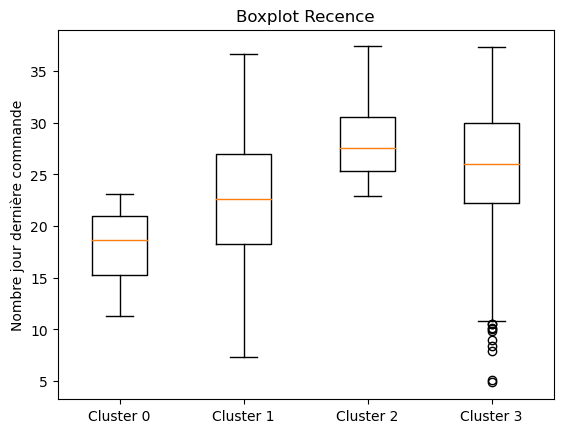

In [35]:
import matplotlib.pyplot as plt

test1 = df[df['Cluster'] == 0]
test2 = df[df['Cluster'] == 1]
test3 = df[df['Cluster'] == 2]
test4 = df[df['Cluster'] == 3]
donnees = [test1['Recency_x'], test2['Recency_x'], test3['Recency_x'],test4['Recency_x']]

plt.boxplot(donnees)
plt.title("Boxplot Recence")
plt.ylabel("Nombre jour dernière commande")

etiquettes = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

plt.xticks(range(1, len(etiquettes) + 1), etiquettes)

plt.show()

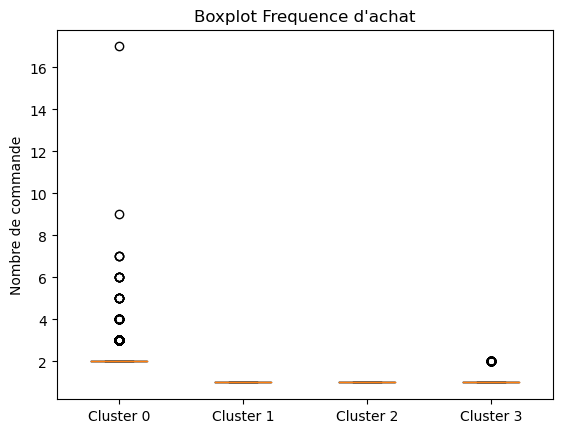

In [48]:
import matplotlib.pyplot as plt

clusters = df['Cluster'].unique()
recency = []

for cluster in clusters:
    recency.append(df[df['Cluster'] == cluster]['Frequency_x'])

plt.boxplot(recency)
plt.title("Boxplot Frequence d'achat")
plt.ylabel("Nombre de commande")

etiquettes = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

plt.xticks(range(1, len(etiquettes) + 1), etiquettes)

plt.show()

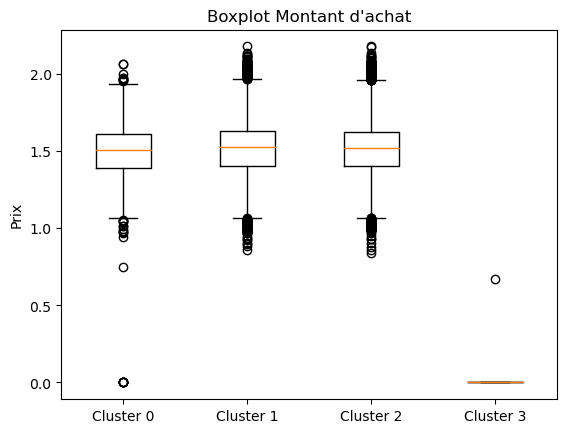

In [49]:
import matplotlib.pyplot as plt

clusters = df['Cluster'].unique()
recency = []

for cluster in clusters:
    recency.append(df[df['Cluster'] == cluster]['Monetary'])

plt.boxplot(recency)
plt.title("Boxplot Montant d'achat")
plt.ylabel("Prix")

etiquettes = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

plt.xticks(range(1, len(etiquettes) + 1), etiquettes)

plt.show()